In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Liabraries import successfully")

Liabraries import successfully


#Load csv File

In [8]:
df = pd.read_csv("C:\\Users\\Owner\\OneDrive\\Desktop\\DataAnalytics\\amazon_sales_data 2025.csv")
print(df.head())

  Order ID      Date        Product     Category  Price  Quantity  \
0  ORD0001  14-03-25  Running Shoes     Footwear     60         3   
1  ORD0002  20-03-25     Headphones  Electronics    100         4   
2  ORD0003  15-02-25  Running Shoes     Footwear     60         2   
3  ORD0004  19-02-25  Running Shoes     Footwear     60         3   
4  ORD0005  10-03-25     Smartwatch  Electronics    150         3   

   Total Sales  Customer Name Customer Location Payment Method     Status  
0          180     Emma Clark          New York     Debit Card  Cancelled  
1          400  Emily Johnson     San Francisco     Debit Card    Pending  
2          120       John Doe            Denver     Amazon Pay  Cancelled  
3          180  Olivia Wilson            Dallas    Credit Card    Pending  
4          450     Emma Clark          New York     Debit Card    Pending  


**1.Exploring The Data**

In [8]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
count,250,250,250,250,250.000000,250.000000,250.000000,250,250,250,250
unique,250,60,10,5,NaN,NaN,NaN,10,10,5,3
top,ORD0001,10-02-25,Smartphone,Electronics,NaN,NaN,NaN,Emma Clark,Houston,PayPal,Completed
freq,1,10,35,118,NaN,NaN,NaN,32,32,60,88
mean,NaN,NaN,NaN,NaN,343.580000,2.856000,975.380000,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,380.635808,1.429489,1252.112254,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,15.000000,1.000000,15.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,2.000000,100.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,150.000000,3.000000,400.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,600.000000,4.000000,1500.000000,NaN,NaN,NaN,NaN


**2.Checking Null Values**

In [13]:
#Check for Missing Values
df.isnull().sum()


Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

**3.Convert Date Column to Datetime Format**


In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

**4.Create New Columns (Month, Year)**

In [25]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [22]:
print(df.describe)

<bound method NDFrame.describe of     Order ID       Date        Product     Category  Price  Quantity  \
0    ORD0001 2025-03-14  Running Shoes     Footwear     60         3   
1    ORD0002 2025-03-20     Headphones  Electronics    100         4   
2    ORD0003 2025-02-15  Running Shoes     Footwear     60         2   
3    ORD0004 2025-02-19  Running Shoes     Footwear     60         3   
4    ORD0005 2025-03-10     Smartwatch  Electronics    150         3   
..       ...        ...            ...          ...    ...       ...   
245  ORD0246 2025-03-17        T-Shirt     Clothing     20         2   
246  ORD0247 2025-03-30          Jeans     Clothing     40         1   
247  ORD0248 2025-03-05        T-Shirt     Clothing     20         2   
248  ORD0249 2025-03-08     Smartwatch  Electronics    150         3   
249  ORD0250 2025-02-19     Smartphone  Electronics    500         4   

     Total Sales  Customer Name Customer Location Payment Method     Status  \
0            180     E

In [22]:
#Convert 'month' to string
monthly_revenue['month'] = monthly_revenue['month'].astype(str)

In [24]:
monthly_revenue['calculated_sales'] = pd.to_numeric(monthly_revenue['calculated_sales'], errors='coerce')

**5.Analyze Data**

In [26]:
# 1. The total sales for each month
monthly_sales = df.groupby('Month')['Total Sales'].sum()
print(monthly_sales)

Month
2    122695
3    117730
4      3420
Name: Total Sales, dtype: int64


In [16]:
# 2. Monthly revenue
monthly_revenue = df.groupby('month')['calculated_sales'].sum().reset_index()
print(monthly_revenue)

     month  calculated_sales
0  2025-02            122695
1  2025-03            117730
2  2025-04              3420


In [17]:
# 3.Category-wise Performance
category_sales = df.groupby('category')['calculated_sales'].sum().sort_values(ascending=False)
print(category_sales)

category
Electronics        129950
Home Appliances    105000
Footwear             4320
Clothing             3540
Books                1035
Name: calculated_sales, dtype: int64


In [18]:
# 4. Monthly Sales Patterns (by quantity sold)
monthly_quantity = df.groupby('month')['quantity'].sum().reset_index()
print(monthly_quantity)

     month  quantity
0  2025-02       326
1  2025-03       367
2  2025-04        21


In [19]:
# 5.City-wise Distribution (by revenue)
city_sales = df.groupby('customer_location')['calculated_sales'].sum().sort_values(ascending=False).head(10)
print(city_sales)

customer_location
Miami            31700
Denver           29785
Houston          28390
Dallas           27145
Seattle          26890
Boston           26170
Chicago          20810
New York         18940
Los Angeles      17820
San Francisco    16195
Name: calculated_sales, dtype: int64


 **6.  Top 10 Best-Selling Products by Revenue**


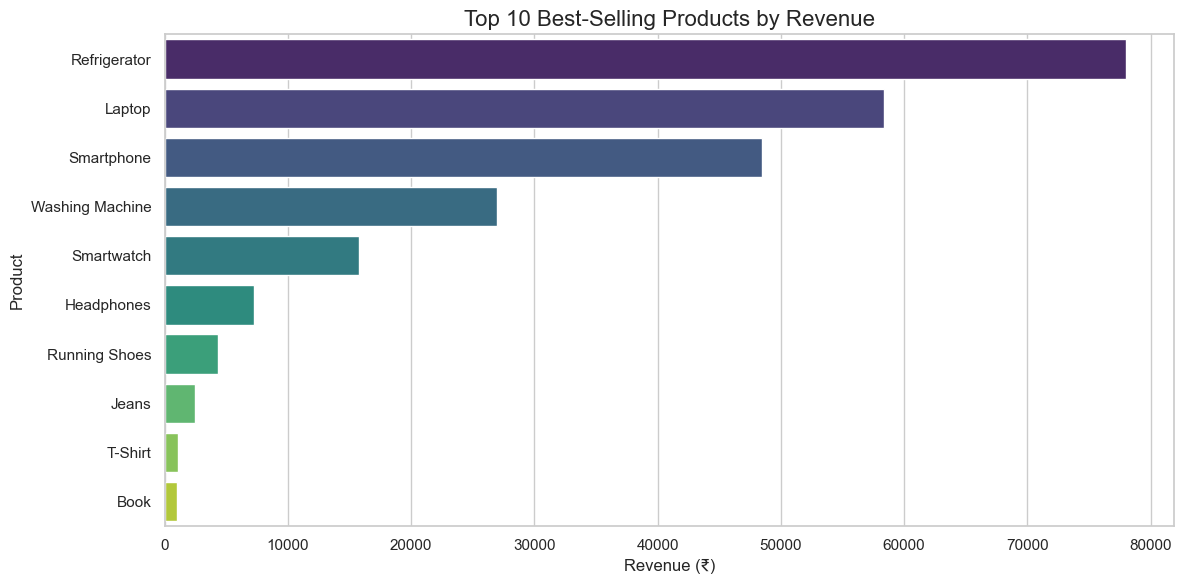

In [40]:
import warnings
warnings.filterwarnings('ignore')

top_products = df.groupby('product')['calculated_sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='calculated_sales', y='product', palette='viridis', legend=False)

plt.title("Top 10 Best-Selling Products by Revenue", fontsize=16)
plt.xlabel("Revenue (₹)", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.tight_layout()
plt.show()


**7. Goal: Monthly Revenue Trend Chart**

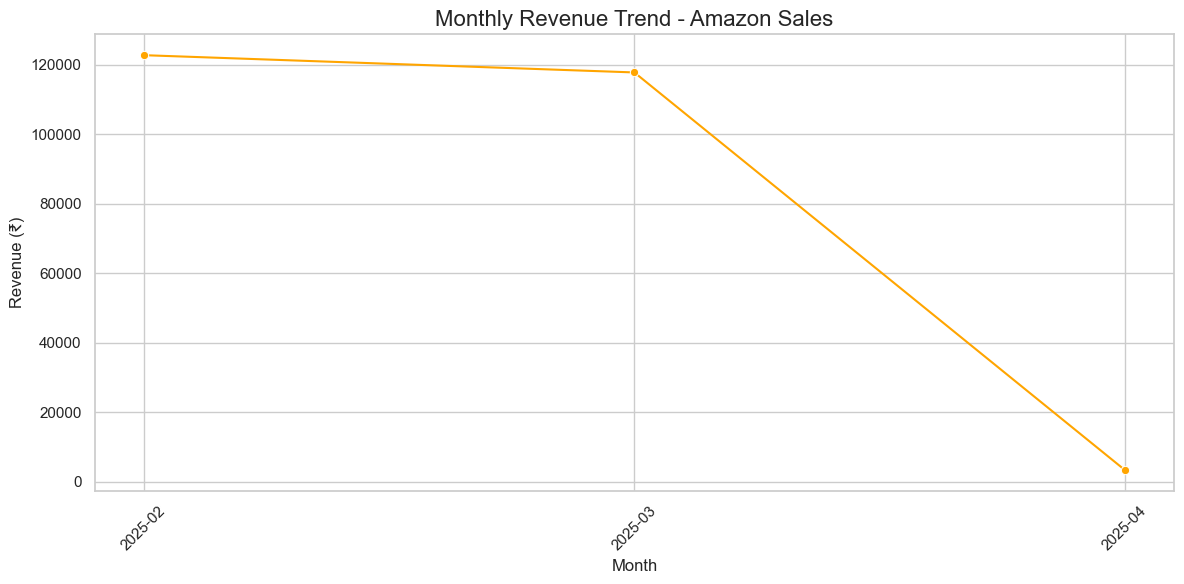

In [27]:
# Seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month', y='calculated_sales', marker='o', color='orange')

plt.title("Monthly Revenue Trend - Amazon Sales", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue (₹)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**8. Monthly Sales Count (Number of Orders)**

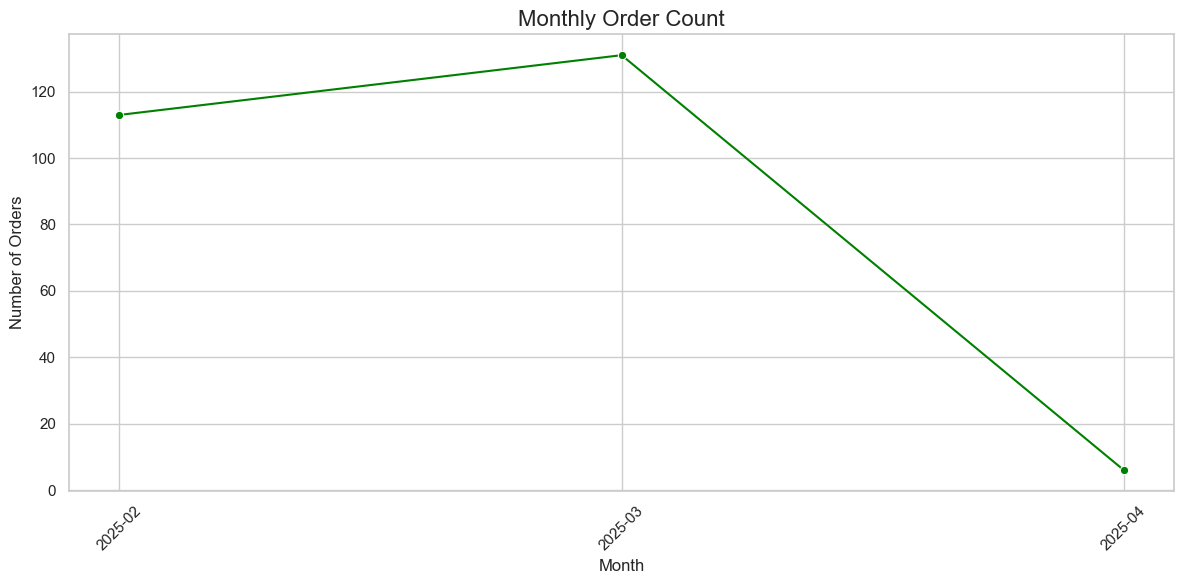

In [32]:
monthly_orders = df.groupby(df['date'].dt.to_period('M')).size().reset_index(name='order_count')
monthly_orders['date'] = monthly_orders['date'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders, x='date', y='order_count', marker='o', color='green')

plt.title("Monthly Order Count", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**9.City-wise Revenue Distribution**

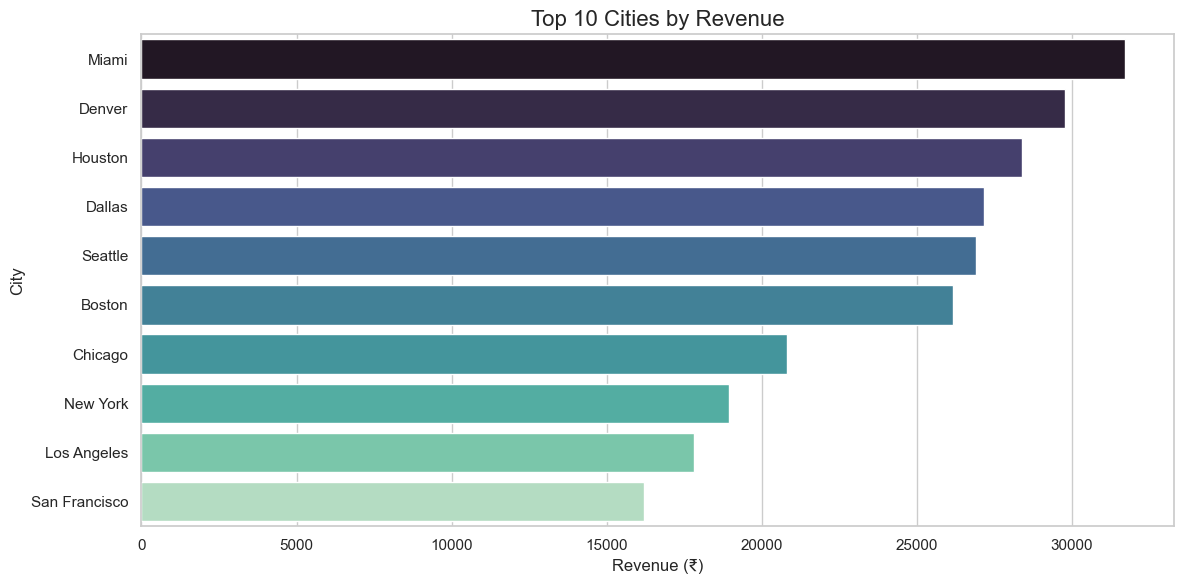

In [52]:
city_revenue = df.groupby('customer_location')['calculated_sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=city_revenue, x='calculated_sales', y='customer_location', palette='mako')

plt.title("Top 10 Cities by Revenue", fontsize=16)
plt.xlabel("Revenue (₹)", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.tight_layout()
plt.show()


**10. Pie Chart – Payment Method Distribution**

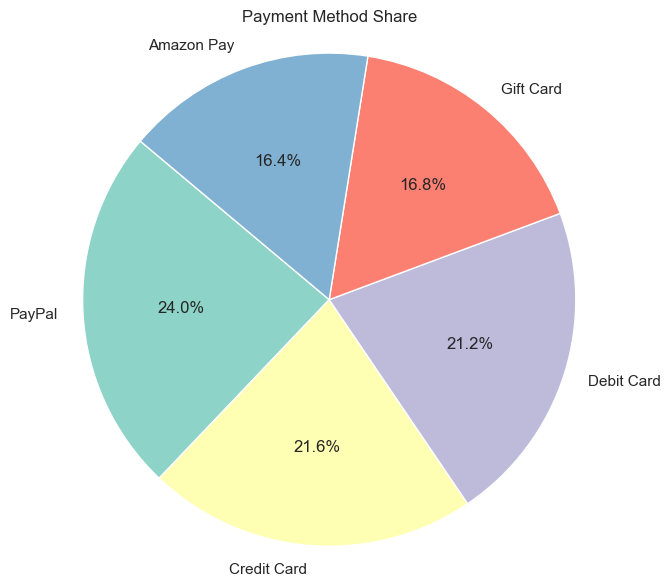

In [58]:
payment_counts = df['payment_method'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title("Payment Method Share")
plt.axis('equal')
plt.show()

**11. Donut Chart – Order Status**

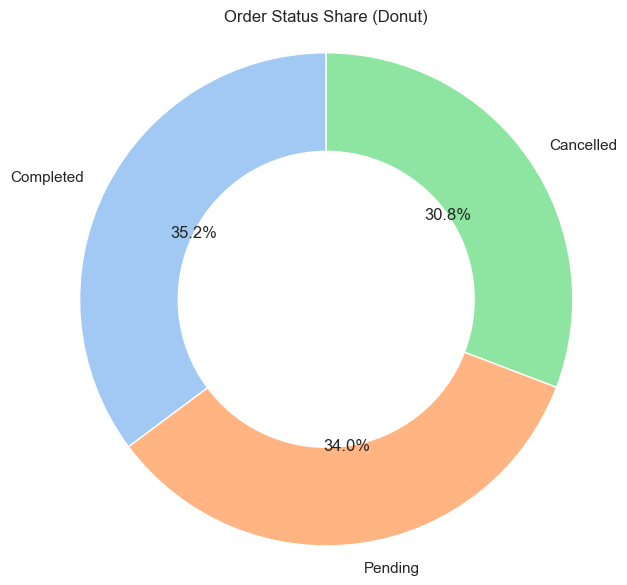

In [61]:
status_counts = df['status'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=sns.color_palette('pastel'))
plt.title("Order Status Share (Donut)")
plt.axis('equal')
plt.show()